# Weather History 

## `00 ` Import libraries 

In [1]:
import numpy as np
import pandas as pd
# visulaization
import matplotlib.pyplot as plt
import seaborn as sns

#check normality
from scipy.stats import shapiro
#for Normalization
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
#handling categorical feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
#spliting data
from sklearn.model_selection import train_test_split
#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
pd.set_option('display.max_columns', None)


c:\Users\CRIZMA MEGA STORE\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\CRIZMA MEGA STORE\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\Users\CRIZMA MEGA STORE\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


## `01 ` Split Data 

In [3]:
num_cols = list(set(df.select_dtypes(exclude=[object]).columns))
cat_cols = list(df.select_dtypes(include=[object]).columns) 

## `02` EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### `2.1` Check Normality

c:\Users\CRIZMA MEGA STORE\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


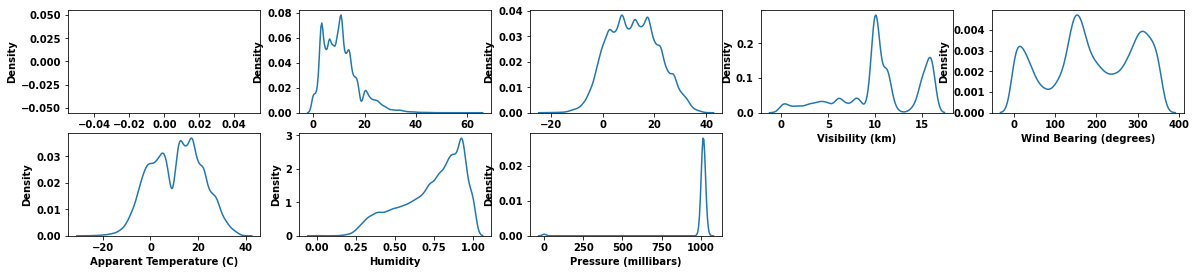

In [5]:

plt.figure(figsize=(20,20))
for i, col in enumerate(df[num_cols]):
    ax = plt.subplot(9, 5, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

### `2.2` Check Nulls

In [6]:
nulls_df = ((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False).reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]


,index,Nulls_Count
0,Precip Type,0.536012


### `2.3` Check Duplicates

In [7]:
#check Duplicates
df.duplicated().sum()

24

### `2.4` Check Outliers

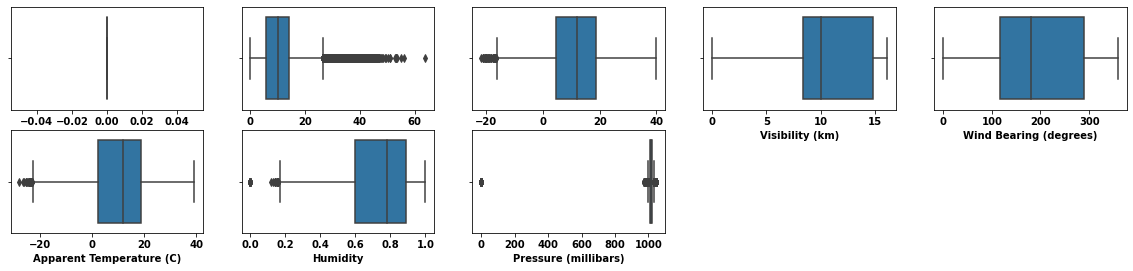

In [8]:
#Check Outliers
plt.figure(figsize=(20,20))
for i, col in enumerate(df[num_cols]):
    plt.subplot(9, 5, i+1)
    sns.boxplot(x = df[col]) 
plt.show()


### `2.5` Check Highly correlated features

<AxesSubplot:>

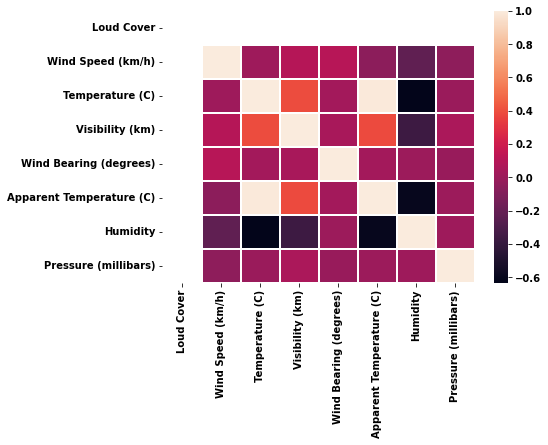

In [9]:
# making a heatmap to inspect the highly correlated features
import seaborn as sns
corr_matrix = df[num_cols].corr()
plt.subplots(figsize = (7, 5))
sns.heatmap(corr_matrix, 
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values, 
           linewidth = 0.1)

### `2.6` Categorical Features

In [10]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [11]:
df['Summary'].value_counts()


Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [12]:
df['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                              20085
Partly cloudy throughout the day.                                                               9981
Partly cloudy until night.                                                                      6169
Partly cloudy starting in the morning.                                                          5184
Foggy in the morning.                                                                           4201
                                                                                               ...  
Mostly cloudy starting in the morning and breezy overnight.                                       24
Mostly cloudy until night and windy starting in the morning continuing until afternoon.           24
Mostly cloudy throughout the day and breezy starting in the evening continuing until night.       24
Light rain in the morning and afternoon.                                                   

 
> ### **Observations :**
> Data have : 
> 1. Nulls
> 2. Duplicate values
> 3. Highly Corrolated Features
> 4. Skewness
> 5. Outliers <br>
>




## `03` Data Preprocessing

In [13]:
## separating the categorical features and numerical features
num_cols = list(set(df.select_dtypes(exclude=[object]).columns))
cat_cols = list(df.select_dtypes(include=[object]).columns) 
ordinal_cols = [] 
nominal_cols = ['Summary', 'Precip Type', 'Daily Summary']
target = ['Temperature (C)']
len(num_cols)

8

#### `3.1` Handling Nulls

In [14]:
## columns which have more than 60% of the data NULL values should be dropped
df = df.drop(columns = ['Loud Cover'])

## when the number of nulls in a row is very small, we can simply drop this small number of rows
df = df.dropna(axis = 0, subset = ['Precip Type'])
num_cols = list(set(df.select_dtypes(exclude=[object]).columns))

#### `3.2` Dropping duplicates

In [15]:
df = df.drop_duplicates()

#### `3.3` Handling Categorical Data

In [16]:
import category_encoders as ce
binaryEncoder = ce.BinaryEncoder()
binary_encoded_df = pd.concat([df, binaryEncoder.fit_transform(df[nominal_cols])], axis=1)
binary_encoded_df.drop(columns= nominal_cols + ['Formatted Date'], inplace=True)
binary_encoded_df.head(5)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_0,Summary_1,Summary_2,Summary_3,Summary_4,Precip Type_0,Precip Type_1,Daily Summary_0,Daily Summary_1,Daily Summary_2,Daily Summary_3,Daily Summary_4,Daily Summary_5,Daily Summary_6,Daily Summary_7
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


#### `3.4` Handling Highly Corrolated Features

In [17]:
train_data, validation_data = train_test_split(binary_encoded_df, test_size = 0.2, random_state = 42)

In [18]:
def handling_highlyCorrelatedFeatures (train_data, validation_data, target, threshold = 0.7):
    num_cols = list(set(train_data.select_dtypes(exclude=[object]).columns))
    features_to_be_dropped = []
    num_cols_wthout_response_var = list(set(num_cols) - set([target]))
    corr_matrix = train_data[num_cols_wthout_response_var].corr() 

    for row_idx in range(corr_matrix.values.shape[0]):
        for col_idx in range(row_idx + 1,corr_matrix.values.shape[0]):
            if (np.abs(corr_matrix.values[row_idx, col_idx]) > threshold):
                var_row_corr_wth_response = np.abs(np.corrcoef(train_data[target], 
                                                        train_data[num_cols_wthout_response_var[row_idx]])[0, 1])
                var_col_corr_wth_response = np.abs(np.corrcoef(train_data[target], 
                                                        train_data[num_cols_wthout_response_var[col_idx]])[0, 1])
                
                if var_row_corr_wth_response > var_col_corr_wth_response:
                    # print('we will drop the column ', num_cols_wthout_response_var[col_idx])
                    train_data = train_data.drop(columns = [num_cols_wthout_response_var[col_idx]])
                    validation_data = validation_data.drop(columns = [num_cols_wthout_response_var[col_idx]])
                    features_to_be_dropped.append(num_cols_wthout_response_var[col_idx])
                else:
                    # print('we will drop the column ', num_cols_wthout_response_var[row_idx])
                    train_data = train_data.drop(columns = [num_cols_wthout_response_var[row_idx]])
                    validation_data = validation_data.drop(columns = [num_cols_wthout_response_var[row_idx]])
                    features_to_be_dropped.append(num_cols_wthout_response_var[row_idx])
    return train_data, validation_data


#### `3.5` Handling Outliers

In [19]:
def bounds_calc(train_data, col, boundry_threshold):
  Q1 = np.percentile(train_data[col], q = 25, interpolation = 'midpoint')
  Q3 = np.percentile(train_data[col], q = 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  Upper_Bound = Q3 + boundry_threshold * IQR
  Lower_Bound = Q1 - boundry_threshold * IQR
  return Lower_Bound, Upper_Bound
    
def outliers_clamping(Lower_Bound, Upper_Bound, value):
  if value > Upper_Bound:
    return Upper_Bound
  elif value < Lower_Bound:
    return Lower_Bound
  else:
    return value

def outliers_handling(train_data, validation_data, boundry_threshold):
    num_data = list(set(train_data.select_dtypes(exclude=[object]).columns))
    for col in num_data:
        Lower_Bound, Upper_Bound = bounds_calc(train_data, col, boundry_threshold)
        train_data[col] = train_data[col].apply(lambda x : outliers_clamping(Lower_Bound, Upper_Bound, x))
        validation_data[col] = validation_data[col].apply(lambda x : outliers_clamping(Lower_Bound, Upper_Bound, x))
    return train_data, validation_data

#### `3.6` Handling Skewness

In [20]:
def skewness_calc(col ,df):
    std_col = np.std(df[col])
    mean_col = np.mean(df[col])
    size_rows = df.count()[0]
    skewness = np.sum(np.power(df[col] - mean_col, 3))/((size_rows - 1) * np.power(std_col, 3))
    return skewness

def skewed_data_transformation(value):
  return np.log(1 + np.abs(value))

def skewness_handling(train_data, validation_data):
    num_data = list(set(train_data.select_dtypes(exclude=[object]).columns))
    skewed_train_cols = []
    for col in num_data: 
        sk = skewness_calc(col, train_data)
        if (np.abs(sk) >= 1):
            skewed_train_cols.append(col)
            train_data[col] = train_data[col].apply(lambda x : skewed_data_transformation(x))
            validation_data[col] = validation_data[col].apply(lambda x : skewed_data_transformation(x))
    return train_data, validation_data

#### `3.7` Feature Scaling

##### `3.7.1 ` Shapiro-Wilk(Normal Distribution) test

In [22]:
def Shapiro_Wilk_test (df, num_cols, alpha):
    feats_std_scale = []
    feats_min_max_scale = []
    sample_data  = train_data.sample(replace = False, n= 500)
    for col in num_cols:
        stat, p = shapiro(sample_data[col])
        if p > alpha:
            feats_std_scale.append(col)
        else:
            feats_min_max_scale.append(col)
    return feats_min_max_scale, feats_std_scale

##### `3.7.2 ` Scaling Features

In [23]:
# brute force code , Don't forget to enhance ittttttt  ----------------->
def scaling_features (train_data, validation_data, alpha):
    num_data = list(set(train_data.select_dtypes(exclude=[object]).columns) - set(['Id']))
    feats_min_max_scale, feats_std_scale = Shapiro_Wilk_test(train_data, num_data, alpha)
    
    if len(feats_std_scale) <= 0  :
        min_max_scaler = MinMaxScaler()
        min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
        min_max_scaled_train_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)
        min_max_scaled_validation_data = pd.DataFrame(min_max_scaler_model.transform(validation_data[feats_min_max_scale]), columns = feats_min_max_scale)
        num_train_data = min_max_scaled_train_data
        num_validation_data = min_max_scaled_validation_data
    elif len(feats_min_max_scale) <= 0 :
        std_scaler = StandardScaler()
        std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
        std_scaled_train_data = pd.DataFrame(std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)
        std_scaled_validation_data = pd.DataFrame(std_scaler_model.transform(validation_data[feats_std_scale]), columns = feats_std_scale)
        num_train_data = std_scaled_train_data
        num_validation_data = std_scaled_validation_data
    else : 
        min_max_scaler = MinMaxScaler()
        min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
        min_max_scaled_train_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)
        min_max_scaled_validation_data = pd.DataFrame(min_max_scaler_model.transform(validation_data[feats_min_max_scale]), columns = feats_min_max_scale)
        
        std_scaler = StandardScaler()
        std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
        std_scaled_train_data = pd.DataFrame(std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)
        std_scaled_validation_data = pd.DataFrame(std_scaler_model.transform(validation_data[feats_std_scale]), columns = feats_std_scale)
        
        num_train_data = std_scaled_train_data.merge(min_max_scaled_train_data, right_index = True, left_index = True)
        num_validation_data = std_scaled_validation_data.merge(min_max_scaled_validation_data, right_index = True, left_index = True)
        
    print("features to be scaled with min max",  feats_min_max_scale)
    print("features to be scaled with standarization",  feats_std_scale)
    
    return num_train_data, num_validation_data


### **Pre-Processing Function** 

In [24]:
def pre_processing(train_data, validation_data, target, boundry_threshold , correlation_threshold, shapiro_alpha):
    
    #2) handling highly Correlated Features
    train_data, validation_data= handling_highlyCorrelatedFeatures (train_data, validation_data, target, correlation_threshold)

    #3) outliers handling for the whole data using training data boundries
    train_data, validation_data = outliers_handling(train_data, validation_data, boundry_threshold)

    #4) skewness handling for the whole data training data boundries
    train_data, validation_data = skewness_handling(train_data, validation_data)
    
    #5) Scaling Features
    num_train_df, num_validation_df = scaling_features(train_data, validation_data, shapiro_alpha)

    return num_train_df, num_validation_df

In [25]:
final_train_data, final_test_data = pre_processing( train_data,
                                                    validation_data,
                                                    target='Apparent Temperature (C)',
                                                    boundry_threshold = 1.5,
                                                    correlation_threshold = 0.7,
                                                    shapiro_alpha = 0.001
                                                    )     
print(f'final_train_data shape = {final_train_data.shape}')  
print(f'final_test_data shape = {final_test_data.shape}')  

C:\Users\CRIZMA MEGA STORE\AppData\Local\Temp\ipykernel_8496\2927179755.py:5: RuntimeWarning: invalid value encountered in double_scalars
  skewness = np.sum(np.power(df[col] - mean_col, 3))/((size_rows - 1) * np.power(std_col, 3))
c:\Users\CRIZMA MEGA STORE\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\CRIZMA MEGA STORE\anaconda3\lib\site-packages\scipy\stats\morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


features to be scaled with min max ['Daily Summary_7', 'Pressure (millibars)', 'Wind Bearing (degrees)', 'Wind Speed (km/h)', 'Visibility (km)', 'Summary_4', 'Humidity', 'Temperature (C)', 'Apparent Temperature (C)', 'Daily Summary_4', 'Daily Summary_5', 'Summary_3', 'Daily Summary_6']
features to be scaled with standarization ['Summary_0', 'Summary_2', 'Daily Summary_3', 'Daily Summary_1', 'Daily Summary_0', 'Precip Type_1', 'Summary_1', 'Daily Summary_2']
final_train_data shape = (76729, 21)
final_test_data shape = (19183, 21)


In [26]:
final_train_data.head(5)

,Summary_0,Summary_2,Daily Summary_3,Daily Summary_1,Daily Summary_0,Precip Type_1,Summary_1,Daily Summary_2,Daily Summary_7,Pressure (millibars),Wind Bearing (degrees),Wind Speed (km/h),Visibility (km),Summary_4,Humidity,Temperature (C),Apparent Temperature (C),Daily Summary_4,Daily Summary_5,Summary_3,Daily Summary_6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.502596,0.754875,0.420193,0.926,1.0,0.880240,0.609138,0.650762,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.384290,0.058496,0.526602,0.039,0.0,0.952096,0.386068,0.396682,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376093,0.866295,1.000000,0.943,1.0,0.473054,0.531748,0.579821,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.919220,0.181378,0.620,0.0,0.964072,0.610312,0.651839,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.480464,0.314763,0.231560,0.890,0.0,0.772455,0.561100,0.606726,0.0,0.0,1.0,1.0


## `04 ` Split Data into dependent cols and response col (X, Y)

In [27]:
Y_train = final_train_data[['Apparent Temperature (C)']]
X_train = final_train_data.loc[:, final_train_data.columns!='Apparent Temperature (C)']

print(f'X_train shape : {X_train.shape}, Y_train shape : {Y_train.shape}')

X_test = final_test_data.loc[:, final_test_data.columns!='Apparent Temperature (C)']
Y_test = final_test_data[['Apparent Temperature (C)']]

print(f'X_test shape : {X_test.shape}, Y_test shape : {Y_test.shape}')



X_train shape : (76729, 20), Y_train shape : (76729, 1)
X_test shape : (19183, 20), Y_test shape : (19183, 1)


## `05`  Finaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaally Training The Model :D 

### Evaluating our linear regression model functions

In [28]:
def mse(actual, predicted):
  return np.mean(np.square(actual-predicted))

def rmse(actual, predicted):
  return np.sqrt(np.mean(np.square(actual-predicted)))

def mae(actual, predicted):
  return np.mean(np.abs(actual-predicted))

def mape(actual, predicted, epsilon = 0.0001):
  return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

def rae(actual, predicted):
  numerator = np.sum(np.abs(predicted - actual))
  denominator = np.sum(np.abs(np.mean(actual) - actual))
  return numerator / denominator

def r_squared(actual, predicted):
  sse = np.sum(np.square(actual-predicted))
  sst = np.sum(np.square(actual-np.mean(actual)))
  return 1 - (sse/sst)

def adj_r_squared(X, actual, predicted): 
  r_squ = r_squared(actual, predicted)
  first_term = 1 - r_squ
  sec_term = (len(actual)-1)/(len(actual) - X.shape[1] - 1)
  return 1 - (first_term * sec_term)

def Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred):
  print('               :  Train Data     |   Test Data ')
  print('mse            : ', mse(Y_train, y_train_pred).to_string(index=False), '  | ', mse(Y_test, y_test_pred).to_string(index=False))
  print('rmse           : ', rmse(Y_train, y_train_pred).to_string(index=False), '  | ', rmse(Y_test, y_test_pred).to_string(index=False))
  print('mae            : ', mae(Y_train, y_train_pred).to_string(index=False), '  | ',  mae(Y_test, y_test_pred).to_string(index=False))
  print('mape           : ', mape(Y_train, y_train_pred).to_string(index=False), '  | ', mape(Y_test, y_test_pred).to_string(index=False))
  print('rae            : ', rae(Y_train, y_train_pred).to_string(index=False), '  | ', rae(Y_test, y_test_pred).to_string(index=False))
  print('r_squared      : ', r_squared(Y_train, y_train_pred).to_string(index=False), '  | ', r_squared(Y_test, y_test_pred).to_string(index=False))
  print('adj_r_squared  : ', adj_r_squared(X_train, Y_train, y_train_pred).to_string(index=False), '  | ', adj_r_squared(X_test, Y_test, y_test_pred).to_string(index=False))


## `05` Support Vector Regressor Kernals VS Linear Regression


## `01` Linear Kernal SVM   VS  Linear Regression

In [72]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10],
              'kernel': ['linear']}
 
grid = GridSearchCV(SVR(), param_grid, cv = 3)
 
# fitting the model for grid search
grid.fit(X_train, Y_train.values.ravel())
print("Best hyper_parameters for Linear kernal is : ", grid.best_params_)
print("Best Score for Linear kernal is : ", grid.best_score_)

Best hyper_parameters for Linear kernal is :  {'C': 1, 'kernel': 'linear'}
Best Score for Linear kernal is :  0.973005810483376


### Linear Kernal SVM 

In [73]:
svr_sklearn  = SVR(kernel = 'linear', C = 1)
fitted_SVR_Sklearn = svr_sklearn.fit(X_train.values, Y_train.values.ravel())
SVR_y_train_pred = fitted_SVR_Sklearn.predict(X_train.values).reshape(-1, 1)
SVR_y_test_pred = fitted_SVR_Sklearn.predict(X_test.values).reshape(-1,1)

Evaluation_report (X_train, Y_train, SVR_y_train_pred, X_test, Y_test, SVR_y_test_pred)


               :  Train Data     |   Test Data 
mse            :   0.000756   |   0.000771
rmse           :   0.027491   |   0.027759
mae            :   0.022123   |   0.022289
mape           :   21.2733   |   26.108419
rae            :   0.151777   |   0.152886
r_squared      :   0.974715   |   0.974366
adj_r_squared  :   0.974708   |   0.97434


### Linear regression 


 

In [74]:
reg = LinearRegression().fit(X_train.values, Y_train.values)
y_train_pred = reg.predict(X_train.values)
y_test_pred = reg.predict(X_test.values)

Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred)


               :  Train Data     |   Test Data 
mse            :   0.000297   |   0.000297
rmse           :   0.017231   |   0.017221
mae            :   0.013624   |   0.013629
mape           :   8.888024   |   10.855342
rae            :   0.093469   |   0.093483
r_squared      :   0.990066   |   0.990135
adj_r_squared  :   0.990064   |   0.990125


## `02` Polynomial Kernal SVM VS Polynomial Regression

### Polynomial Kernal SVM

In [30]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1],
              'gamma': [0.01, 0.1, 1],
              'degree': [2],
              'kernel': ['poly']}
 
grid = GridSearchCV(SVR(), param_grid)
 
# fitting the model for grid search
grid.fit(X_train, Y_train.values.ravel())
print("Best hyper_parameters for rbf is : ", grid.best_params_)

Best hyper_parameters for rbf is :  {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}


In [31]:
svr_sklearn  = SVR(kernel = 'poly', C = 1, gamma= 0.1, degree = 2)
fitted_SVR_Sklearn = svr_sklearn.fit(X_train.values, Y_train.values.ravel())
SVR_y_train_pred = fitted_SVR_Sklearn.predict(X_train.values).reshape(-1, 1)
SVR_y_test_pred = fitted_SVR_Sklearn.predict(X_test.values).reshape(-1, 1)

Evaluation_report (X_train, Y_train, SVR_y_train_pred, X_test, Y_test, SVR_y_test_pred)


               :  Train Data     |   Test Data 
mse            :   0.00091   |   0.000923
rmse           :   0.03016   |   0.030375
mae            :   0.023882   |   0.023989
mape           :   24.757871   |   40.216273
rae            :   0.163846   |   0.164546
r_squared      :   0.969567   |   0.969308
adj_r_squared  :   0.969559   |   0.969276


### Polynomial Regression

In [75]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train.values)
X_poly_test = poly.transform(X_test.values)

poly_feats_linear_reg = LinearRegression()
poly_feats_linear_reg.fit(X_poly_train, Y_train)
poly_trian_preds = poly_feats_linear_reg.predict(X_poly_train)
poly_test_preds = poly_feats_linear_reg.predict(X_poly_test)
Evaluation_report (X_train, Y_train, poly_trian_preds, X_test, Y_test, poly_test_preds)



               :  Train Data     |   Test Data 
mse            :   0.000101   |   0.000103
rmse           :   0.010039   |   0.010141
mae            :   0.007319   |   0.00739
mape           :   7.660485   |   7.651668
rae            :   0.050211   |   0.050693
r_squared      :   0.996628   |   0.996579
adj_r_squared  :   0.996627   |   0.996575


## `03` RBF Kernal SVM

In [76]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVR(), param_grid, cv = 3)
 
# fitting the model for grid search
grid.fit(X_train.values,  Y_train.values.ravel())
print("Best hyper_parameters for rbf is : ", grid.best_params_)
print("Best Score for rbf is : ", grid.best_score_)

Best hyper_parameters for rbf is :  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score for rbf is :  0.9584006453368671


In [29]:
svr_sklearn  = SVR(kernel = 'rbf', C = 1, gamma= 0.1)
fitted_SVR_Sklearn = svr_sklearn.fit(X_train.values, Y_train.values.ravel())
SVR_y_train_pred = fitted_SVR_Sklearn.predict(X_train.values).reshape(-1, 1)
SVR_y_test_pred = fitted_SVR_Sklearn.predict(X_test.values).reshape(-1, 1)

Evaluation_report (X_train, Y_train, SVR_y_train_pred, X_test, Y_test, SVR_y_test_pred)


               :  Train Data     |   Test Data 
mse            :   0.001177   |   0.001186
rmse           :   0.034311   |   0.034434
mae            :   0.028434   |   0.028458
mape           :   24.845027   |   32.438302
rae            :   0.195071   |   0.195198
r_squared      :   0.960614   |   0.960556
adj_r_squared  :   0.960603   |   0.960515
